```markdown
# Linear Regression: CO2 Emissions vs Engine Size

## Problem Statement
We aim to create a multiple linear regression model using some of these features to predict CO2 emissions of unobserved cars based on the selected features.


## Dataset
Source: [FuelConsumptionCo2.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv)

## Steps
1. Import necessary libraries
2. Load and explore the dataset
3. Prepare the data for training
4. Train a linear regression model
5. Evaluate the model
6. Visualize the results

In [33]:
#step-1:import liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,r2_score


In [34]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df=pd.read_csv(url)
df.sample(5)
print(df.head())



   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   

In [35]:
#step-2:selecting relevant features
features=['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']
X=df[features]
y=df['CO2EMISSIONS']


In [36]:
#step-3:splitting data into training 80% and testing 20% data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#step-4:training the model
model=LinearRegression()
model.fit(X_train,y_train)

#making prediction
y_pred=model.predict(X_test)

In [37]:
#step-5:evaluating the model
mse=mean_squared_error(y_test,y_pred)
print("Mean squared error:%.2f",mse)
r2=r2_score(y_test,y_pred)
print("R2 score:%.2f",r2)

#step-6:dispalying model coefficients to
print("Coefficients:",model.coef_)
print("Intercept:",model.intercept_)


Mean squared error:%.2f 512.8551370148302
R2 score:%.2f 0.8759705206914069
Coefficients: [11.2094395   7.15561381  9.5208118 ]
Intercept: 67.34838518362096


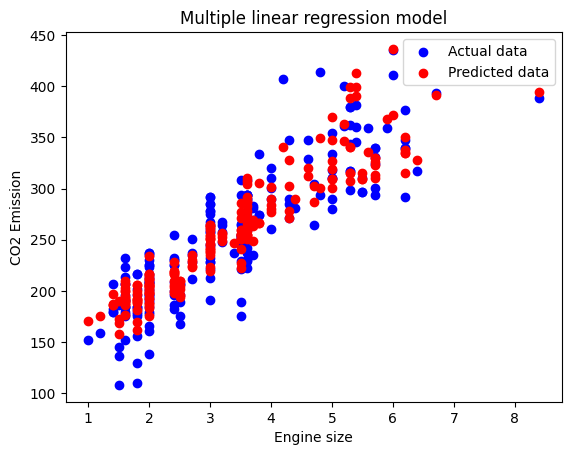

In [38]:
#step-7:plotting the model
plt.scatter(X_test['ENGINESIZE'],y_test,color='blue',label='Actual data')
plt.scatter(X_test['ENGINESIZE'],y_pred,color='red',label='Predicted data')
#plt.plot(X_test['ENGINESIZE'],y_pred,color='green',label='Regression line')
plt.xlabel('Engine size')
plt.ylabel('CO2 Emission')
plt.legend()
plt.title('Multiple linear regression model')
plt.show()